# Ad Cost Regression Analysis
## Use regression to predict Amount Spent on ads
### Homework for Digital Advertising

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv( 'Travel Pony Facebook.csv' )

df.head()

,Start Date,End Date,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Engagement (USD)
0,12/2/13,12/2/13,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,1.219512
1,12/1/13,12/1/13,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,1.395349
2,11/30/13,11/30/13,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,1.190476
3,11/29/13,11/29/13,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,1.167315
4,11/22/13,11/22/13,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,2.512857


In [3]:
# remove rows with 0 amount spent
df[ 'spent' ] = df[ 'Amount Spent (USD)' ]
df = df.loc[ df.spent != 0 ]

/Users/matt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


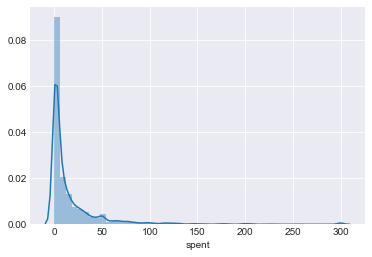

In [4]:
# QUESTION 1
# plot histogram of amount spent
sns.set_style( 'darkgrid' )
sns.distplot( df[ 'spent' ] )

In [7]:
# QUESTION 2
# create categorical variables for predictors
df[ 'Campaign Name' ] = df[ 'Campaign Name' ].astype( 'category' )
df[ 'Campaign Code' ] = df[ 'Campaign Name' ].cat.codes

# create dependent and predictor variables
y = df[ 'spent' ]
x = df[ [ 'Campaign Code', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks',
         'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments',
         'Post Shares', 'Photo Views', 'Website Clicks' ] ]

df.head()

,Start Date,End Date,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Engagement (USD),spent,Campaign Code
0,12/2/13,12/2/13,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,1.219512,300.00,1
1,12/1/13,12/1/13,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,1.395349,300.00,1
2,11/30/13,11/30/13,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,1.190476,300.00,1
3,11/29/13,11/29/13,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,1.167315,300.00,1
4,11/22/13,11/22/13,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,2.512857,35.18,379


In [9]:
# run multiple regression
model = sm.OLS( y, x ).fit()
predictions = model.predict(x)

model.summary()

# Three highest significant predictors:
# 1. Page Likes
# 2. Post Engagement
# 3. Post Shares

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spent   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2211.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:27:48   Log-Likelihood:                -6605.9
No. Observations:                1802   AIC:                         1.324e+04
Df Residuals:                    1789   BIC:                         1.331e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Campaign Code       0.0109      0.002      4.908      0.000       0.007       0.015
Reach               0.0034      0.000     22.479      0.000       0.003       0.004
Frequency          -2.7259      0.510     -5.341      0.000      -3.727      -1.725
Impressions        -0.0012   5.82e-05    -20.650      0.000      -0.001      -0.001
Clicks             -0.1577      0.112     -1.410      0.159      -0.377       0.062
Unique Clicks       0.3058      0.127      2.413      0.016       0.057       0.554
Page Likes         23.0569      9.517      2.423      0.016       4.391      41.722
Page Engagement   -19.7428      9.513     -2.075      0.038     -38.401      -1.084
Post Engagement    16.7998      7.929      2.119      0.034       1.250      32.350
Post Likes          2.3358      1.591      1.469      0.142      -0.784       5.455
Post Comments       3.4252      1.654      2.071      0.038       0.182       6.669
Post Shares         4.5029      1.614      2.790      0.005       1.338       7.668
Photo Views         3.1634      1.589      1.991      0.047       0.047       6.279
Website Clicks      3.3725      1.589      2.123      0.034       0.256       6.489
==============================================================================
Omnibus:                      926.260   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27449.152
Skew:                           1.822   Prob(JB):                         0.00
Kurtosis:                      21.770   Cond. No.                     8.13e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""